# Data Science Project

**Author Name:** Thomas Nguyen <br> 
**Course:** Data 606 <br> 
**Instructor:** Dr. Charojie (Jay) Wang

# Maryland Statewide Vehicle Crashes (2015-2022) 

# Overview: 

The crash data for Maryland is obtained from https://opendata.maryland.gov/. Crash data in Maryland are reported from January 2015 through December 2022. The dataset contains total of 56 columns and 878343 entries. The dataset is downloaded as a CSV file. In the state of Maryland, on average there are 115,555 car accidents each year over five-year period. This is one of the highest percentage of car crashes on highways and county roads. 


**Data Source:**  https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu

# Use of Data: 

## Predicting Crashes

### **Crash severity classification:**

#### **Features:**

- COUNTY_DESC: Counties in Maryland (Montgomery, Frederick, Howard, etc.)
- YEAR: Values of year the crash occurred 2015-2022
- QUARTER: Values of each quarter (Q1, Q2, Q3, Q4)
- COLLISION_TYPE_DESC: Description of collision (Head on righ turn, same direction rear end, etc.)
- RD_COND_DESC: Description of the road condition (No defects or defects) 
- RD_DIV_DESC: Description of road divided (Two-way, divided, one-way)
- LIGHT_DESC: Description of light time (Daylight, Dark, etc.)
- SURF_COND_DESC: Description of surface condition (Dry, wet, etc.)
- WEATHER_DESC: Description of weather condition (Blowing sand, clear, raining)
- HARM_EVENT_DESC1: Description of the cause of accident  
- HARM_EVENT_DESC2: Description of the cause of accident2
- REPORT_TYPE: Type of accident reported (Property, fatal, or injury crash)
- FEET_MILES_FLAG_DESC: Description of feet or miles
- FIX_OBJ_DESC: Description of property near accident 
- ACC_DATE: Accident Date
- ACC_TIME: Accident Time
- SIGNAL_FLAG_DESC: Yes or No, if direction was flagged 
- C_M_ZONE_FLAG: Contains values of N or Y 
- DISTANCE_DIR_FLAG: Distance of direction flagged (N, S, E, W) 
- JUNCTION_DESC: Description of juntion (Alley, intersection, etc.)
- LOG_MILE: Distance of accident from survey zone
- LOGMILE_DIR_FLAG_DESC: Description of direction accident occurred (North, South, West, East)
- DISTANCE: Distance of the crash
- REFERENCE_ROAD_NAME: References of road name

#### **Target:**

- REPORT_TYPE: Type of accident reported (Property, fatal, or injury crash)


## Importing packages

In [1]:
#Importing the packages
import pandas as pd 
import numpy as np 

#Importing visualization tools
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading in our dataset
crash = pd.read_csv("Maryland_Statewide_Vehicle_Crashes.csv")
crash.sample(5)

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
637998,2018,Q1,Daylight,1.0,Anne Arundel,2.0,NaN,0.0,Intersection Related,3.0,...,NaN,F,N,512.0,CO,NaN,8TH AVE NE,39.175807,-76.617189,POINT (-76.6171891987324 39.1758067688892)
637685,2017,Q1,Daylight,1.0,Anne Arundel,2.0,NaN,0.0,NaN,88.0,...,NaN,F,N,0.0,UU,NaN,ENTRANCE FOR PARKING TO VILLAGE GREEN,39.006878,-76.696501,POINT (-76.6965008166667 39.00687825)
105764,2021,Q3,Daylight,1.0,Prince George's,16.0,NaN,0.0,Intersection,2.0,...,Feet,F,S,414.0,MD,NaN,ST BARNABAS RD,38.832685,-76.940754,POINT (-76.940753564292 38.832685084602)
381213,2015,Q1,Dark No Lights,4.0,Wicomico,22.0,NaN,NaN,Non Intersection,1.0,...,NaN,F,N,384.0,CO,NaN,SHOCKLEY RD,38.443987,-75.445132,POINT (-75.4451322555542 38.4439868195489)
36749,2020,Q4,Dark No Lights,4.0,Charles,8.0,NaN,0.0,Non Intersection,1.0,...,Feet,F,E,1406.0,CO,NaN,SWAN HARBOR CT,38.537283,-76.723577,POINT (-76.723577356684 38.537282998128)


In [3]:
# Checking for information
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878343 entries, 0 to 878342
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   878343 non-null  int64  
 1   QUARTER                878343 non-null  object 
 2   LIGHT_DESC             841025 non-null  object 
 3   LIGHT_CODE             878343 non-null  float64
 4   COUNTY_DESC            878329 non-null  object 
 5   COUNTY_NO              878329 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              659957 non-null  float64
 8   JUNCTION_DESC          760119 non-null  object 
 9   JUNCTION_CODE          791512 non-null  float64
 10  COLLISION_TYPE_DESC    878343 non-null  object 
 11  COLLISION_TYPE_CODE    878343 non-null  int64  
 12  SURF_COND_DESC         789107 non-null  object 
 13  SURF_COND_CODE         791512 non-null  float64
 14  LANE_CODE              668083 non-nu

In [4]:
crash.shape

(878343, 55)

### Checking for specific columns and values

In [5]:
# Print example of all the columns
print(crash.columns)

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_CODE', 'RD_COND_DESC', 'RD_COND_CODE',
       'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC', 'FIX_OBJ_CODE',
       'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC', 'WEATHER_CODE', 'ACC_DATE',
       'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC', 'SIGNAL_FLAG',
       'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE', 'HARM_EVENT_DESC1',
       'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2', 'HARM_EVENT_CODE2', 'RTE_NO',
       'ROUTE_TYPE_CODE', 'RTE_SUFFIX', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC',
       'LOGMILE_DIR_FLAG', 'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC',
       'FEET_MILES_FLAG', 'DISTANCE_DIR_FLAG', 'REFERENCE_NO',
       'REFERENCE_TYPE_CODE', 'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dty

### Checking for distinct values for specific columns

In [6]:
# Checking for the values in report types 
reports = crash['REPORT_TYPE'].unique()

for REPORT_TYPE in reports: 
    print(REPORT_TYPE)

Property Damage Crash
Injury Crash
Fatal Crash
nan


In [7]:
# Checking for collision type 
collision = crash['COLLISION_TYPE_DESC'].unique()

for COLLISION_TYPE_DESC in collision: 
    print(COLLISION_TYPE_DESC)

Other
Same Movement Angle
Single Vehicle
Unknown
Same Direction Rear End
Head On
Same Direction Sideswipe
Angle Meets Right Turn
Not Applicable
Same Direction Right Turn
Angle Meets Left Turn Head On
Opposite Direction Both Left Turn
Opposite Direction Sideswipe
Same Direction Rear End Left Turn
Angle Meets Left Turn
Same Direction Left Turn
Head On Left Turn
Same Direction Rear End Right Turn
Same Direction Both Left Turn


In [8]:
# Checking for the values in harm event 
harm = crash['HARM_EVENT_DESC1'].unique()

for HARM_EVENT_DESC1 in harm:
    print(HARM_EVENT_DESC1)

Parked Vehicle
Other Vehicle
Fixed Object
Pedestrian
Bicycle
Other
nan
Backing
Off Road
Not Applicable
Other Object
Unknown
Other Non Collision
Overturn
Units Separated
Animal
Explosion or Fire
Other Pedalcycle
Other Conveyance
U-turn
Downhill Roadway
Thrown or Falling Object
Fell Jumped from Motor Vehicle
Jackknife
Railway Train
Spilled Cargo
Immersion


In [9]:
# Checking for the road condition 
road = crash['RD_COND_DESC'].unique()

for RD_COND_DESC in road:
    print(RD_COND_DESC)


nan
No Defects
Not Applicable
Unknown
Holes, Ruts, Etc.
Loose Surface Material
Other
Foreign Material
Shoulder Defect
View Obstructed
Obstruction Not Signaled
Obstruction Not Lighted


In [10]:
# Checking for null values 
crash.isnull().sum()

YEAR                          0
QUARTER                       0
LIGHT_DESC                37318
LIGHT_CODE                    0
COUNTY_DESC                  14
COUNTY_NO                    14
MUNI_DESC                878343
MUNI_CODE                218386
JUNCTION_DESC            118224
JUNCTION_CODE             86831
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            89236
SURF_COND_CODE            86831
LANE_CODE                210260
RD_COND_DESC              86831
RD_COND_CODE              86831
RD_DIV_DESC               91486
RD_DIV_CODE               86831
FIX_OBJ_DESC              47111
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             427866
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 477155
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE_FLAG                 0
AGENCY_C

In [11]:
# Using specific columns from the original dataframe but making a new dataframe 
columns = ['COUNTY_DESC', 'YEAR', 'QUARTER', 'COLLISION_TYPE_DESC', 'RD_COND_DESC', 'RD_DIV_DESC', 
'LIGHT_DESC','SURF_COND_DESC','WEATHER_DESC', 'HARM_EVENT_DESC1', 'HARM_EVENT_DESC2', 'REPORT_TYPE', 
'FEET_MILES_FLAG_DESC', 'FIX_OBJ_DESC', 'ACC_DATE', 'ACC_TIME', 'SIGNAL_FLAG_DESC', 'C_M_ZONE_FLAG', 
'DISTANCE_DIR_FLAG', 'JUNCTION_DESC', 'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'DISTANCE', 'REFERENCE_ROAD_NAME']

# Copying the columns into new dataframe 
df_crash = crash[columns].copy()

In [12]:
# Joining fatal and injury together as severe crash since they are similar 
df_crash['REPORT_TYPE'] = df_crash['REPORT_TYPE'].replace({'Fatal Crash': 'Severe Crash', 'Injury Crash': 'Severe Crash'})

In [13]:
# Dropping rows with nan in REPORT_TYPE 
df_crash = df_crash.dropna(subset=['REPORT_TYPE'])

In [14]:
# Checking the counts for all columns 
df_crash.REPORT_TYPE.value_counts()

Property Damage Crash    550429
Severe Crash             217181
Name: REPORT_TYPE, dtype: int64

In [15]:
# Displaying the new dataframe 
df_crash.sample(5)

,COUNTY_DESC,YEAR,QUARTER,COLLISION_TYPE_DESC,RD_COND_DESC,RD_DIV_DESC,LIGHT_DESC,SURF_COND_DESC,WEATHER_DESC,HARM_EVENT_DESC1,...,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,C_M_ZONE_FLAG,DISTANCE_DIR_FLAG,JUNCTION_DESC,LOG_MILE,LOGMILE_DIR_FLAG_DESC,DISTANCE,REFERENCE_ROAD_NAME
335051,Calvert,2017,Q1,Same Direction Rear End,Not Applicable,Not Applicable,Daylight,Dry,Clear,NaN,...,20170311,16:18:00,No,N,N,Intersection Related,21.979,North,0.08,PLUM POINT RD
782775,Anne Arundel,2018,Q2,Single Vehicle,No Defects,One-way Trafficway,Daylight,Wet,Raining,NaN,...,20180415,14:01:00,No,N,W,Non Intersection,2.150,East,50.00,DAVIDSONVILLE RD
662333,Baltimore,2018,Q4,Same Direction Rear End,NaN,NaN,Daylight,NaN,Clear,NaN,...,20181219,14:30:00,Yes,N,NaN,NaN,NaN,NaN,NaN,NaN
234648,Frederick,2022,Q3,Same Movement Angle,No Defects,"Two-way, Not Divided",Daylight,Dry,NaN,Other Pedalcycle,...,20220816,14:27:00,No,N,E,NaN,0.440,East,60.00,E 2ND ST
131558,Baltimore City,2021,Q2,Same Movement Angle,No Defects,"Two-way, Not Divided",Dark Lights On,Dry,NaN,Other Vehicle,...,20210503,00:06:00,Yes,N,U,Intersection Related,0.000,NaN,0.00,200 N SCHROEDER ST


In [16]:
# Checking for nulls 
df_crash.isnull().sum()

COUNTY_DESC                  14
YEAR                          0
QUARTER                       0
COLLISION_TYPE_DESC           0
RD_COND_DESC              74158
RD_DIV_DESC               78127
LIGHT_DESC                29945
SURF_COND_DESC            76110
WEATHER_DESC             345004
HARM_EVENT_DESC1         484726
HARM_EVENT_DESC2              0
REPORT_TYPE                   0
FEET_MILES_FLAG_DESC     468214
FIX_OBJ_DESC              41599
ACC_DATE                      0
ACC_TIME                      0
SIGNAL_FLAG_DESC              0
C_M_ZONE_FLAG                 0
DISTANCE_DIR_FLAG         74158
JUNCTION_DESC            100660
LOG_MILE                  74159
LOGMILE_DIR_FLAG_DESC    149460
DISTANCE                  86823
REFERENCE_ROAD_NAME       74932
dtype: int64

In [17]:
# Changing all the columns from new dataframe where they are null as 'unknown' because it wasnt reported in accident 
df_crash.fillna('Unknown', inplace=True)
df_crash.sample(5)

,COUNTY_DESC,YEAR,QUARTER,COLLISION_TYPE_DESC,RD_COND_DESC,RD_DIV_DESC,LIGHT_DESC,SURF_COND_DESC,WEATHER_DESC,HARM_EVENT_DESC1,...,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,C_M_ZONE_FLAG,DISTANCE_DIR_FLAG,JUNCTION_DESC,LOG_MILE,LOGMILE_DIR_FLAG_DESC,DISTANCE,REFERENCE_ROAD_NAME
862910,Howard,2019,Q3,Same Direction Rear End,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Daylight,Dry,Unknown,Unknown,...,20190719,13:14:00,No,N,S,Unknown,0.2,South,0.5,BROKEN LAND PKWY
700094,Howard,2019,Q4,Head On Left Turn,No Defects,"Two-way, Not Divided",Dark No Lights,Wet,Raining,Unknown,...,20191123,20:28:00,No,N,N,Intersection,0.93,North,0.0,RAMP 4 FR MARRIOTTSVILLE RD TO IS 70 EB
854809,Baltimore,2017,Q1,Same Direction Rear End,No Defects,"Two-way, Not Divided",Daylight,Dry,Not Applicable,Unknown,...,20170227,15:27:00,Yes,N,N,Intersection Related,0.26,South,30.0,LAKEWOOD RD
183743,Prince George's,2022,Q1,Other,No Defects,"Two-way, Not Divided",Daylight,Dry,Unknown,Other Vehicle,...,20220201,11:59:00,No,N,S,Non Intersection,0.13,North,50.0,STOCONGA DR
133641,Prince George's,2021,Q2,Single Vehicle,No Defects,"Two-way, Divided, Unprotected (painted >4 feet...",Dark Lights On,Dry,Unknown,Fixed Object,...,20210510,20:27:00,No,N,E,Not Applicable,1.11,East,10.0,KIRBY MANOR CT


In [18]:
df_crash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767610 entries, 0 to 878342
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   COUNTY_DESC            767610 non-null  object
 1   YEAR                   767610 non-null  int64 
 2   QUARTER                767610 non-null  object
 3   COLLISION_TYPE_DESC    767610 non-null  object
 4   RD_COND_DESC           767610 non-null  object
 5   RD_DIV_DESC            767610 non-null  object
 6   LIGHT_DESC             767610 non-null  object
 7   SURF_COND_DESC         767610 non-null  object
 8   WEATHER_DESC           767610 non-null  object
 9   HARM_EVENT_DESC1       767610 non-null  object
 10  HARM_EVENT_DESC2       767610 non-null  object
 11  REPORT_TYPE            767610 non-null  object
 12  FEET_MILES_FLAG_DESC   767610 non-null  object
 13  FIX_OBJ_DESC           767610 non-null  object
 14  ACC_DATE               767610 non-null  int64 
 15  

In [19]:
# Checking for the road condition 
report = df_crash['REPORT_TYPE'].unique()

for REPORT_TYPE in report:
    print(REPORT_TYPE)


Property Damage Crash
Severe Crash


In [20]:
df_crash.isnull().sum()

COUNTY_DESC              0
YEAR                     0
QUARTER                  0
COLLISION_TYPE_DESC      0
RD_COND_DESC             0
RD_DIV_DESC              0
LIGHT_DESC               0
SURF_COND_DESC           0
WEATHER_DESC             0
HARM_EVENT_DESC1         0
HARM_EVENT_DESC2         0
REPORT_TYPE              0
FEET_MILES_FLAG_DESC     0
FIX_OBJ_DESC             0
ACC_DATE                 0
ACC_TIME                 0
SIGNAL_FLAG_DESC         0
C_M_ZONE_FLAG            0
DISTANCE_DIR_FLAG        0
JUNCTION_DESC            0
LOG_MILE                 0
LOGMILE_DIR_FLAG_DESC    0
DISTANCE                 0
REFERENCE_ROAD_NAME      0
dtype: int64

# EDA - Exploratory Data Analysis 

## Crashes that occurred for each county in Maryland

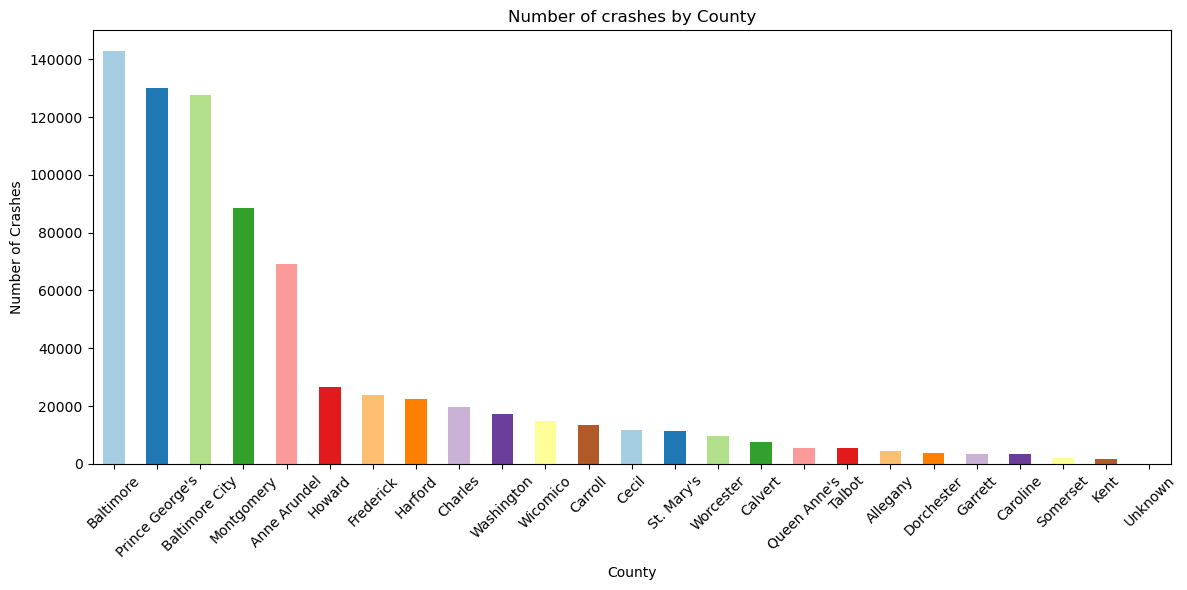

In [21]:
# Selecting the county column 
county = df_crash['COUNTY_DESC']

# Counting the number of times each crash occurred for each county 
crash_count = county.value_counts()

# Changing the color 
color = sns.color_palette('Paired', len(crash_count))

# Creating bar plot 
plt.figure(figsize = (12,6))
crash_count.plot(kind='bar', color=color)
plt.title('Number of crashes by County')
plt.xlabel('County')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the bar plot 
plt.show()

## Number of crashes per year

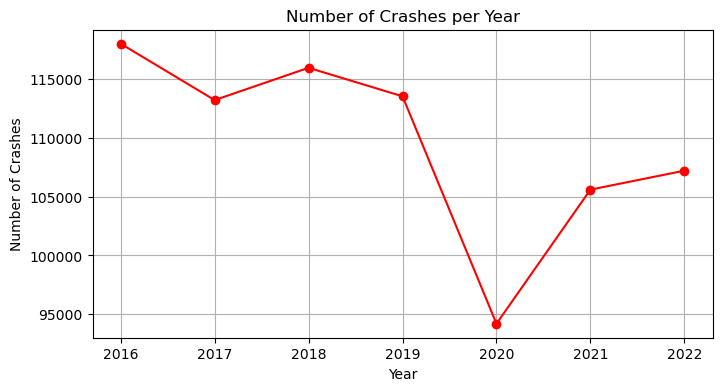

In [22]:
# Selecting the year column 
years = df_crash['YEAR']

# count the number of crashes per year 
year_crash = years.value_counts().sort_index()


# Creating line plot 
plt.figure(figsize =(8,4))
plt.plot(year_crash.index, year_crash.values, marker='o', linestyle='-', color='red')
plt.title('Number of Crashes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(year_crash.index)
plt.grid(True)

# Displaying the plot 
plt.show()

## Inclement weather condition vs crashes?

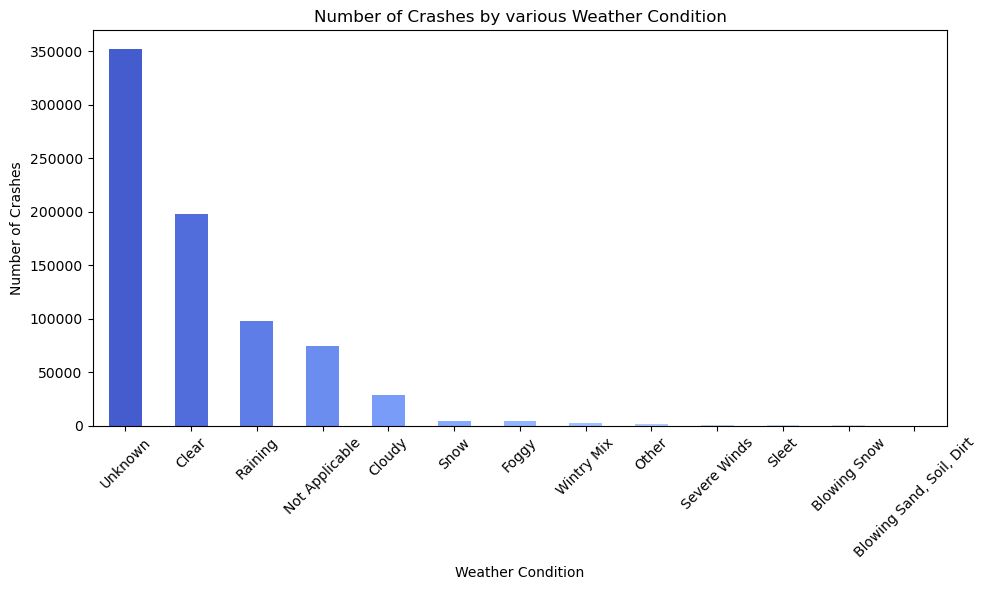

In [23]:
# Selecting the weather condition column
weather = df_crash['WEATHER_DESC']
weather_crash = weather.value_counts() # Counting  the number of crashes for each weather condition 

# changing color 
color = sns.color_palette('coolwarm', len(crash_count))

# Creating a scatter plot 
plt.figure(figsize=(10,6))
weather_crash.plot(kind='bar', color=color)
plt.title('Number of Crashes by various Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the graph 
plt.show()

## Counties with the most crashes

In [24]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt 
import squarify

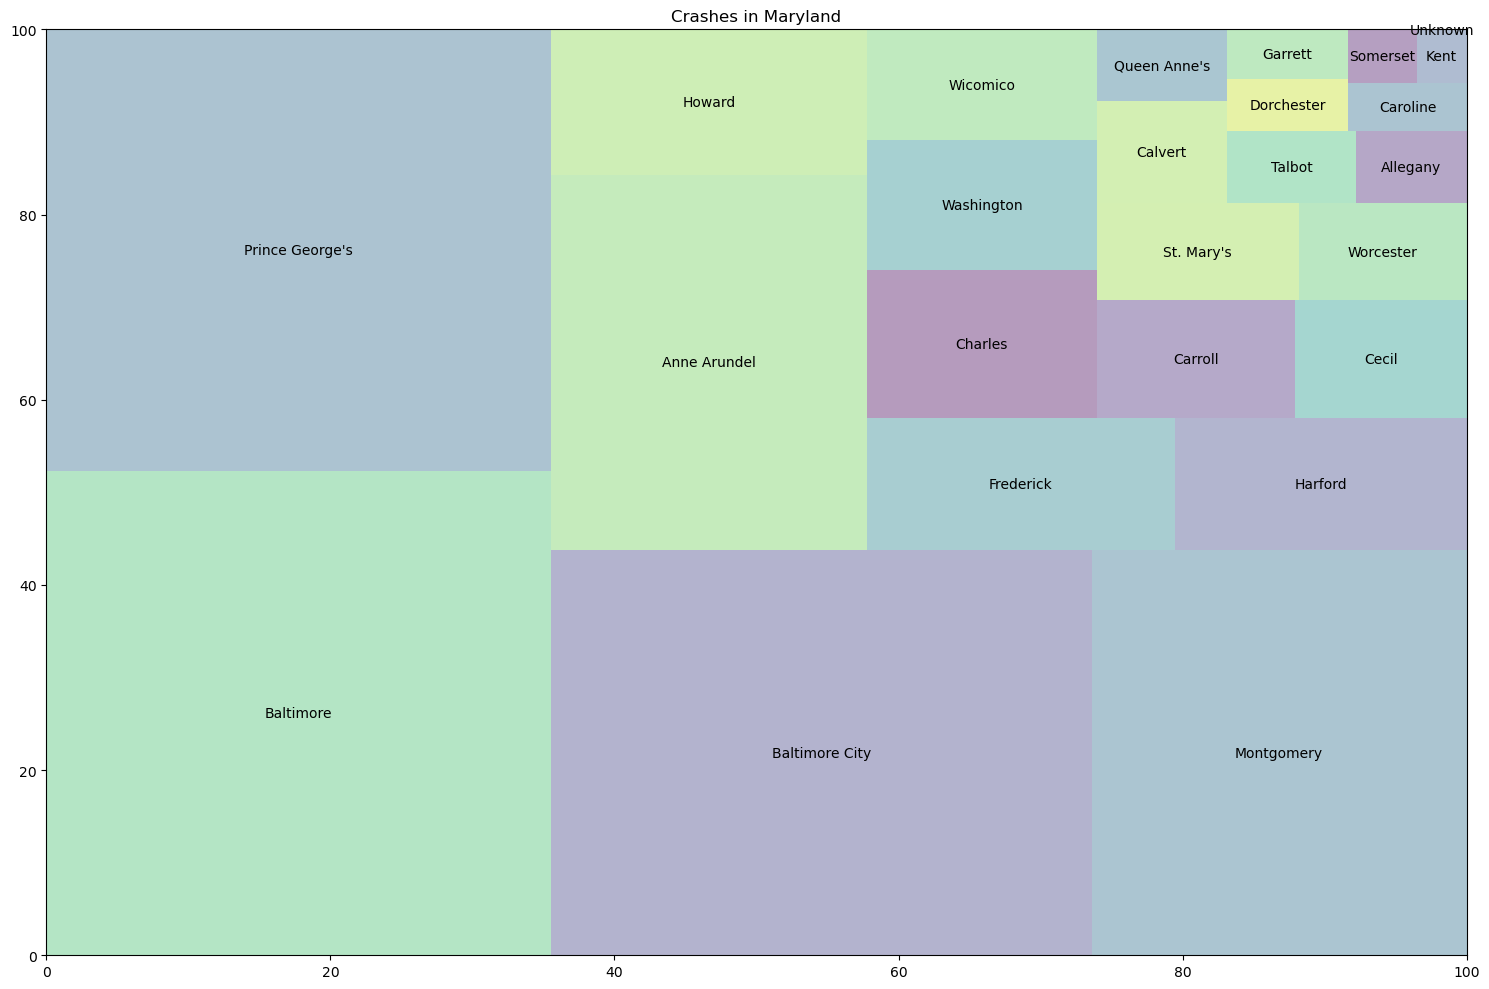

In [26]:
# Calculating the count for each County in MD 
values_county = df_crash['COUNTY_DESC'].value_counts()

# setting the size of plot treemap 
fig, ax = plt.subplots(figsize=(15, 10))


# Plot the treemap 
squarify.plot(sizes=values_county.values, label=values_county.index, alpha=0.4)
plt.title("Crashes in Maryland")
plt.tight_layout()
plt.show()

## Crashes by County and Year 

In [27]:
# selecting counties and year column 
subset_df = df_crash[['COUNTY_DESC', 'YEAR']]

#Counting the occurrences of each counties and year
count_df = subset_df.groupby(['COUNTY_DESC', 'YEAR']).size().reset_index(name='COUNT')

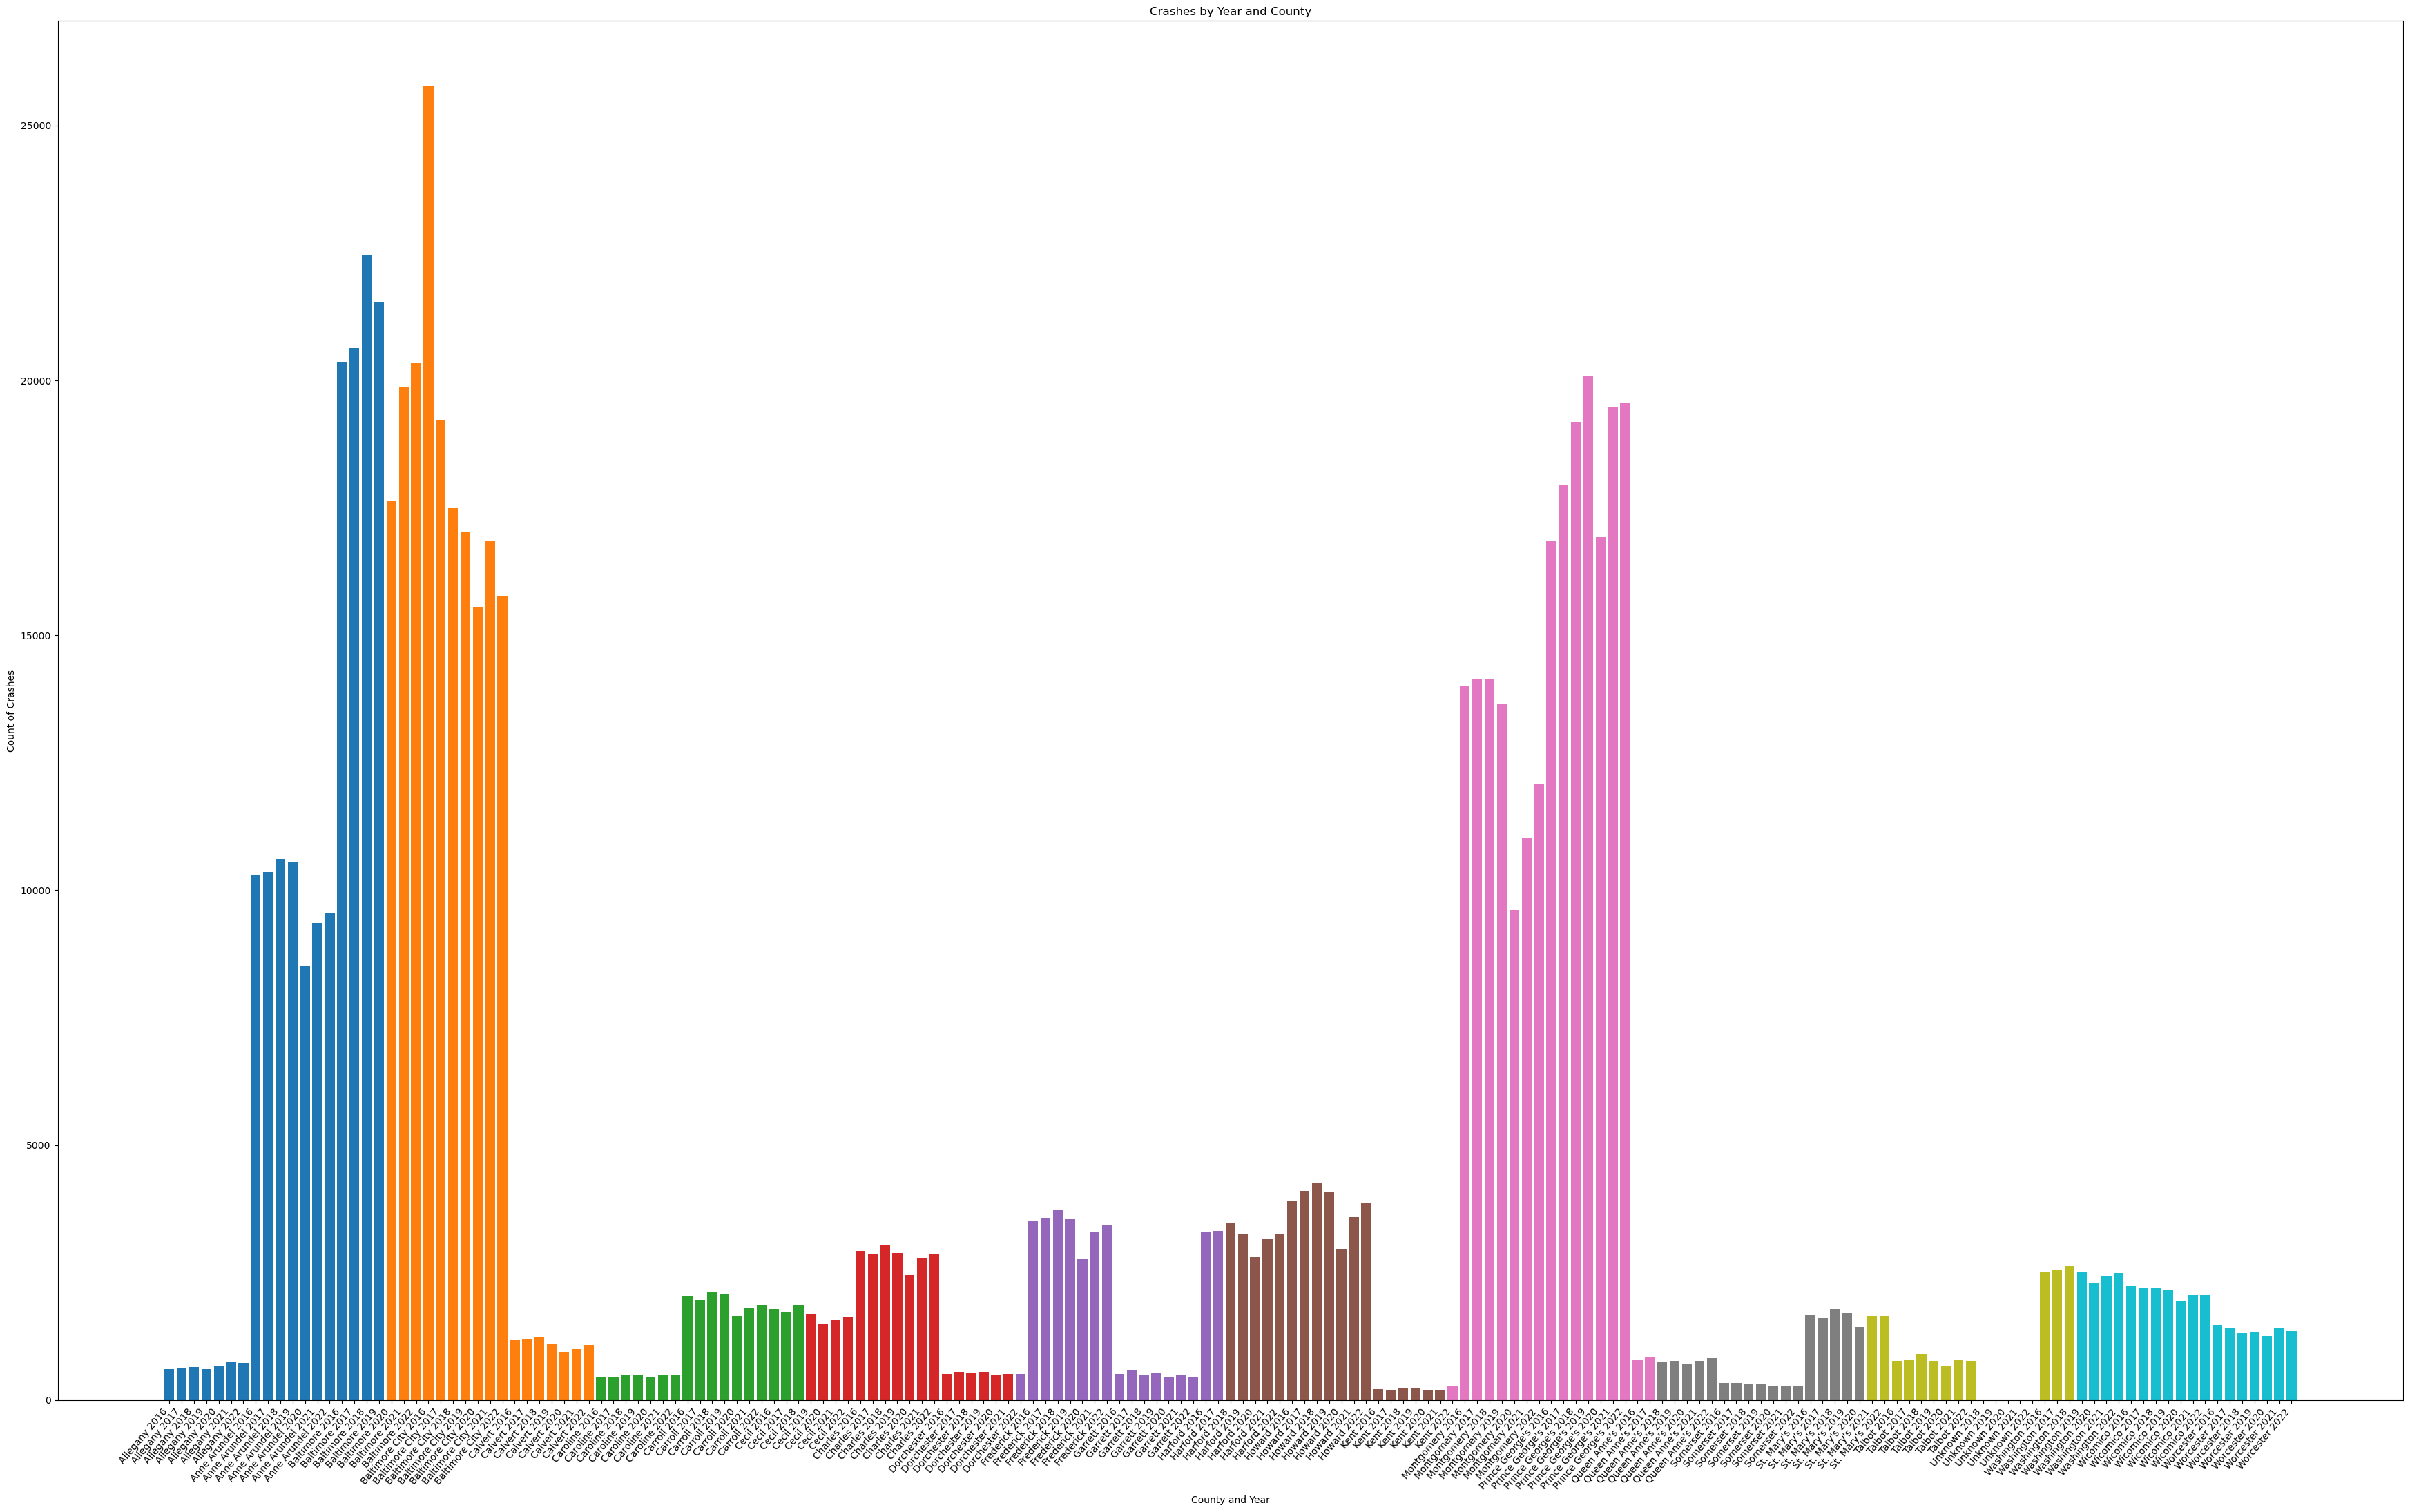

In [28]:
#Defining the length of county and year
num_bars = len(count_df)
colors = plt.cm.get_cmap('tab10', num_bars)

# Plotting the bar graph 
plt.figure(figsize=(35,22))
plt.bar(count_df['COUNTY_DESC'] + ' ' + count_df['YEAR'].astype(str), count_df['COUNT'], color = colors(range(num_bars)))
plt.xlabel('County and Year')
plt.ylabel('Count of Crashes')
plt.title('Crashes by Year and County')
plt.xticks(rotation=50, ha='right')
plt.tight_layout()
plt.show()

## Plotly Express Visualization for Maryland Crash

In [29]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


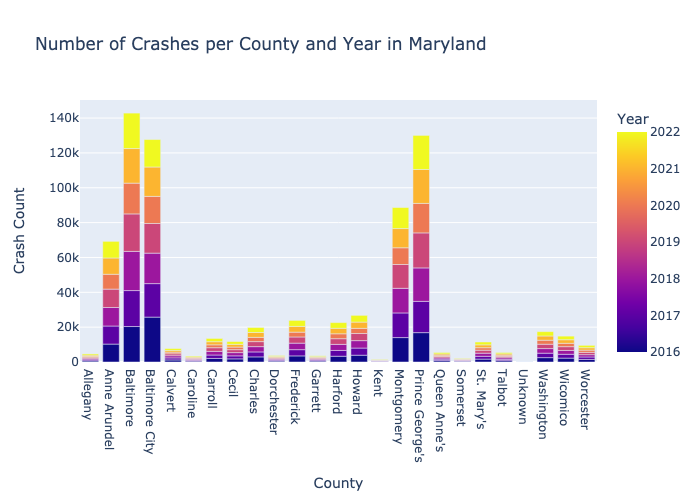

In [30]:
# Importing plotly express 
import plotly.express as px 

# Group by county and year to get total number of crashes per year 
county_data = df_crash.groupby(['COUNTY_DESC', 'YEAR']).size().reset_index(name='Count of Crash')

# Create bar plot using plotly express
bar_plot = px.bar(county_data, x='COUNTY_DESC', y='Count of Crash', color='YEAR',
              title='Number of Crashes per County and Year in Maryland', 
             labels={'COUNTY_DESC': 'County', 'YEAR': 'Year', 'Count of Crash': 'Crash Count'})

# Showing the bar plot 
bar_plot.show("png")

# Save image and html 
bar_plot.write_html("bar_plot.html")
bar_plot.write_image("bar_plot.png")

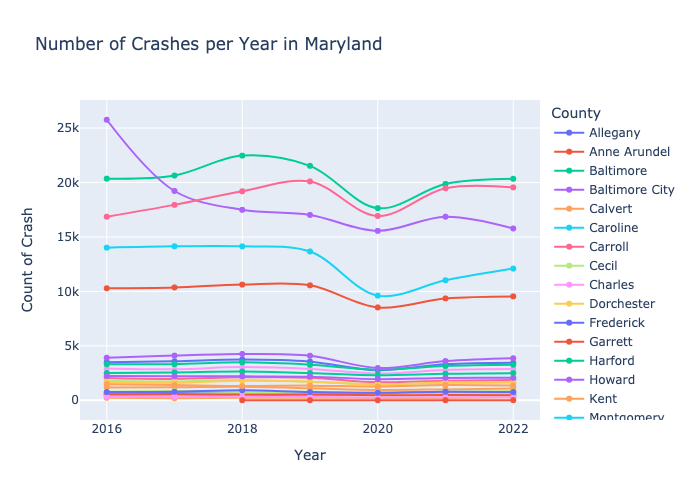

In [31]:
# Group by county and year to get total number of crashes per year 
county_data = df_crash.groupby(['COUNTY_DESC','YEAR']).size().reset_index(name='Count of Crash')

# Create bar plot using plotly express
line_plot = px.line(county_data, x='YEAR', y='Count of Crash', color='COUNTY_DESC',
              title='Number of Crashes per Year in Maryland', 
             labels={'COUNTY_DESC': 'County','YEAR': 'Year', 'Crash_Count': 'Crash Count'}, 
            hover_name='COUNTY_DESC', line_shape='spline', render_mode='svg', markers=True)

# Showing the bar plot 
line_plot.show("png")

# Save image and html
line_plot.write_html("line_plot.html")
line_plot.write_image("line_plot.png")

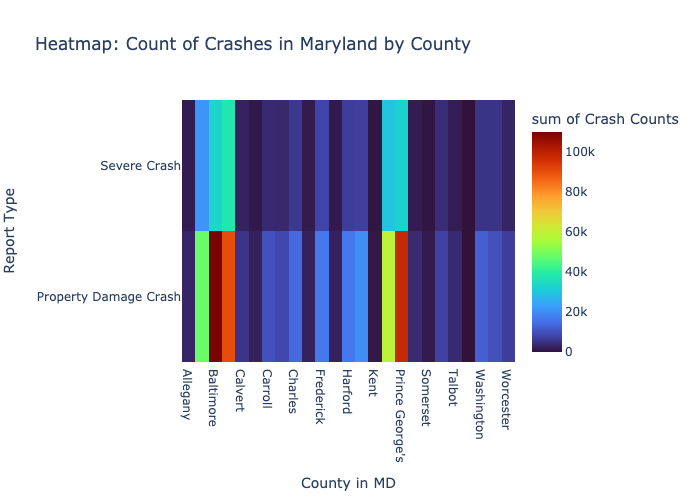

In [32]:
# Value counts for the grouped data'COUNTY_DESC' and REPORT_TYPE column 
grouped_data = df_crash.groupby(['COUNTY_DESC', 'REPORT_TYPE']).size().reset_index(name='Crash Counts')

# create heatmap for county 
heatmap_plot = px.density_heatmap(grouped_data, x='COUNTY_DESC', y='REPORT_TYPE', z='Crash Counts',  
                                  nbinsx=20, 
                                  nbinsy=20,
                                  color_continuous_scale='Turbo', 
                                  title='Heatmap: Count of Crashes in Maryland by County')

# Renaming the x and y axis for the labels
heatmap_plot.update_yaxes(title_text='Report Type') # y axis 
heatmap_plot.update_xaxes(title_text='County in MD') # x axis 

# show heatmap
heatmap_plot.show("png")

# Save image and html
heatmap_plot.write_html("heatmap_plot.html")
heatmap_plot.write_image("heatmap_plot.png")

## References: 
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://www.trollingerlaw.com/car-accident-statistics/#:~:text=The%20most%20current%20car%20crash,county%20roads%20(23%20percent).
- https://matplotlib.org/stable/tutorials/colors/colormaps.html
- https://towardsdatascience.com/make-a-treemap-in-python-426cee6ee9b8
- https://python-charts.com/part-whole/treemap-matplotlib/#:~:text=The%20squarify%20library%20provides%20a,can%20remove%20it%20with%20plt.
- https://plotly.com/python/plotly-express/#scatter-line-area-and-bar-charts
- https://plotly.com/python/plotly-express/#overview
- https://plotly.com/python/2D-Histogram/
- https://plotly.com/python/builtin-colorscales/
- https://plotly.com/python/interactive-html-export/#:~:text=Any%20figure%20can%20be%20saved,access%20the%20fully%20interactive%20figure.
- https://en.ai-research-collection.com/plotly-write_html/
